In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv
/kaggle/input/sales-and-satisfaction/Sales_with_NaNs_v1.3.csv


# Importing important libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Dataset loading

In [3]:
file_path = "/kaggle/input/sales-and-satisfaction/Sales_with_NaNs_v1.3.csv"  # Update if necessary
df = pd.read_csv(file_path)

# Inspecting dataset

In [4]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB
None

Missing Values:
Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64


# Handling Missing Values

In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean

In [6]:
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Impute categorical columns with mode

In [7]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Verify missing data after imputation 

In [9]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Group                           0
Customer_Segment                0
Sales_Before                    0
Sales_After                     0
Customer_Satisfaction_Before    0
Customer_Satisfaction_After     0
Purchase_Made                   0
dtype: int64


# Encode target and features

In [8]:
target_column = 'Purchase_Made'  # Update based on the dataset
df[target_column] = LabelEncoder().fit_transform(df[target_column])

# Split features (X) and target (Y)

In [9]:
X = df.drop(target_column, axis=1)
y = df[target_column]

# Handle categorical features for x using one-hot encoding

In [10]:
X = pd.get_dummies(X, drop_first=True)

# Scale the features

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the SVM model

In [13]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Making Predictions

In [15]:
y_pred = svm_linear.predict(X_test)

# Evaluate the model

In [16]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[   0  873]
 [   0 1127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       873
           1       0.56      1.00      0.72      1127

    accuracy                           0.56      2000
   macro avg       0.28      0.50      0.36      2000
weighted avg       0.32      0.56      0.41      2000


Accuracy Score: 0.5635


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature_{i}" for i in range(X_train.shape[1])]

In [18]:
print("Original features:", df.drop('Purchase_Made', axis=1).columns)
print("Processed features:", X_train.shape[1])


Original features: Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After'],
      dtype='object')
Processed features: 7


In [19]:
print("Features in original DataFrame:", df.drop('Purchase_Made', axis=1).columns)
print("Features in X_train:", [f"Feature_{i}" for i in range(X_train.shape[1])])


Features in original DataFrame: Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After'],
      dtype='object')
Features in X_train: ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']


In [20]:
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = df.drop('Purchase_Made', axis=1).columns  # Original names


# Using encoded and scaled features

In [21]:
feature_names = pd.get_dummies(df.drop('Purchase_Made', axis=1), drop_first=True).columns

# Ensuring the features

In [22]:
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]  # Generate generic names

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': svm_linear.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

     Feature  Importance
4  Feature_4    0.000024
1  Feature_1    0.000023
6  Feature_6    0.000018
3  Feature_3    0.000009
5  Feature_5    0.000003
0  Feature_0   -0.000004
2  Feature_2   -0.000018


In [23]:
print("Shape of coefficients:", svm_linear.coef_.shape)
print("Number of features:", len(df.drop('Purchase_Made', axis=1).columns))


Shape of coefficients: (1, 7)
Number of features: 6


  0%|          | 0/10 [00:00<?, ?it/s]

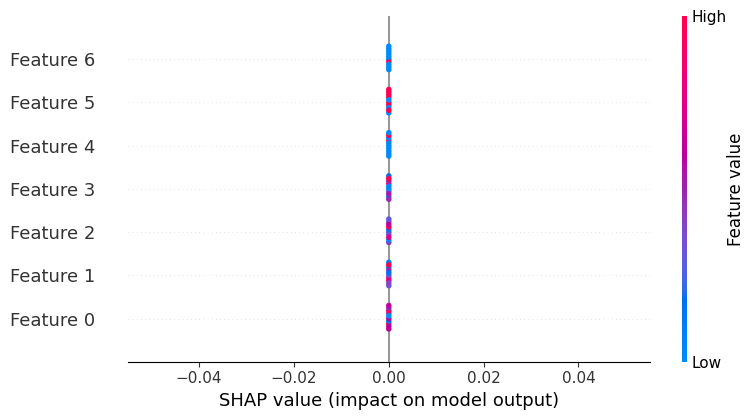

In [25]:
import shap

# Create an explainer
explainer = shap.KernelExplainer(svm_linear.predict, X_train)

# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test[:10]) 

# Visualize feature importance
shap.summary_plot(shap_values, X_test[:10])


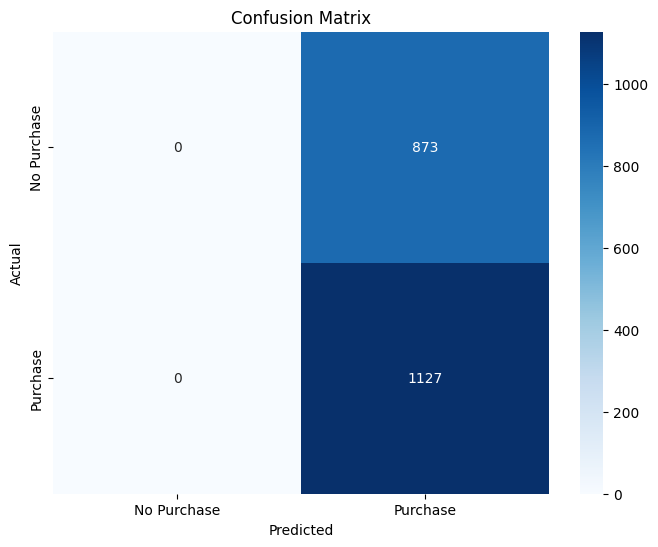

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


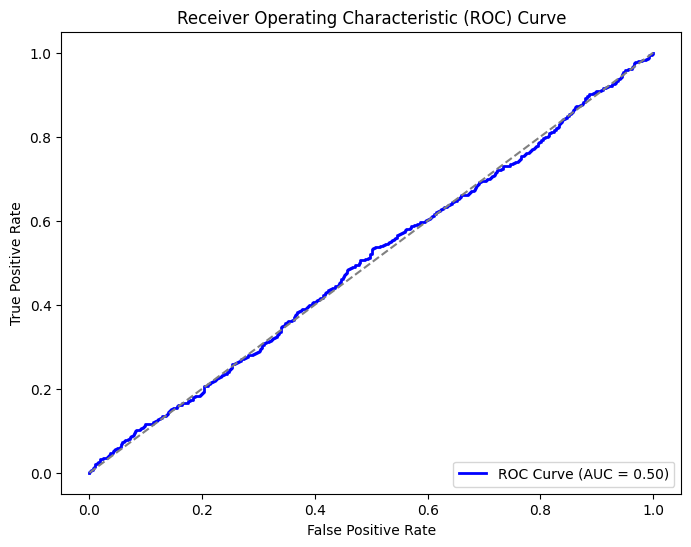

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels (if needed)
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Predict probabilities
y_prob = svm_linear.decision_function(X_test)

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
